<a href="https://colab.research.google.com/github/CoolerKula/Hello-world/blob/master/Time_Series_Analysis_and_Forecasting_Project_Bernard_Kula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Sweet Lift Taxi company has collected historical Data on taxi orders at airports. To attract more
drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a
model for such a prediction.
The RMSE metric on the test set should not be more than 48.

**Project Instructions**

● Structure your notebook i.e. Defining the Problem, Data Importation, Exploration,...
Recommendations etc.

● Download the Data and resample it by one hour.

● Analyze the Data.

● Train different models with different hyperparameters. The test sample should be 10% of
the initial Dataset.

● Test the Data using the test sample and provide a conclusion.

In [48]:
#Import libraries
import pandas as pd


In [49]:
#Import Data
Data = pd.read_csv('https://bit.ly/3p1QPAv')
Data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [50]:
Data = pd.read_csv('https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0])

Data.sort_index(inplace=True)
print(Data.index.is_monotonic)
print(Data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [51]:
Data.sort_index(inplace=True)
Data = Data['2018-03-01 00:00:00':'2018-08-31 23:50:00']
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


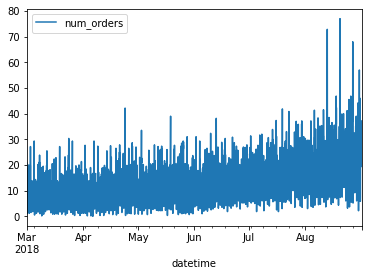

In [52]:
Data.sort_index(inplace=True)
Data = Data.resample('1H').mean()
Data.plot();

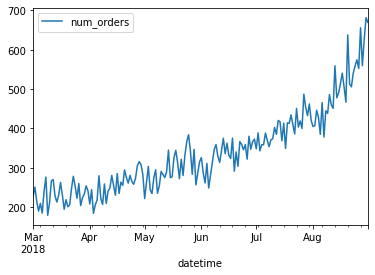

In [53]:
Data.sort_index(inplace=True)
Data = Data['2018-03-01 00:00:00':'2018-08-31 23:50:00'].resample('1D').sum()
Data.plot();

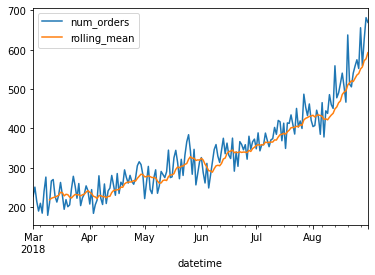

In [54]:
Data.sort_index(inplace=True)
Data = Data['2018-03-01 00:00:00':'2018-08-31 23:50:00'].resample('1D').sum()
Data['rolling_mean'] = Data.rolling(10).mean()
Data.plot();

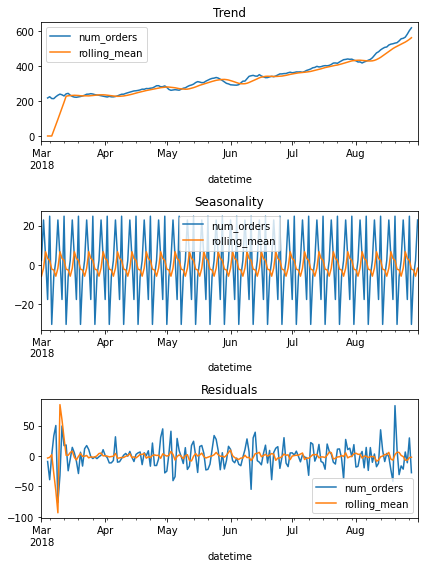

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

Data.sort_index(inplace=True)
Data = Data['2018-03-01 00:00:00':'2018-08-31 23:50:00'].resample('1D').sum()

decomposed = seasonal_decompose(Data)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

In [56]:
Data.sort_index(inplace=True)
Data = Data['2018-03-01 00:00:00':'2018-03-01 01:00:00'].resample('1D').sum()

Data

,num_orders,rolling_mean
datetime,,
2018-03-01,227.333333,0.0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17591.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17591.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17591.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17591.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


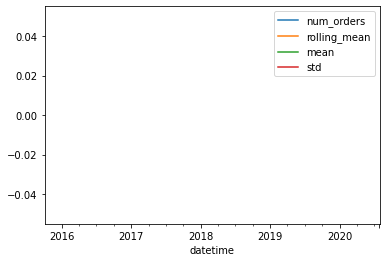

In [58]:
Data.sort_index(inplace=True)
Data = Data['2018-01':'2018-06'].resample('1D').sum()
Data -= Data.shift()
Data['mean'] = Data['num_orders'].rolling(15).mean()
Data['std'] = Data['num_orders'].rolling(15).std()
Data.plot();